In [111]:
from tyssue.generation.hexagonal_grids import circle
from scipy.spatial import Voronoi
from tyssue.generation import from_2d_voronoi
from tyssue import Sheet, SheetGeometry
from tyssue import config
from tyssue.draw import sheet_view
from tyssue.dynamics.planar_vertex_model import PlanarModel as model
from tyssue.solvers.quasistatic import QSSolver
import random

from pprint import pprint

from process_bigraph import Process, Composite, ProcessTypes
from process_bigraph.emitter import emitter_from_wires, gather_emitter_results
from spatial_transport.processes.diffusion import SimpleDiffusion
from spatial_transport.processes.tyssue_diffusion import run_tyssue_diffusion, static_sheet_video_2d
from spatial_transport import register_types
import io
import imageio.v2 as imageio
import matplotlib.pyplot as plt

from spatial_transport.processes.diffusion import get_simple_diffusion_spec

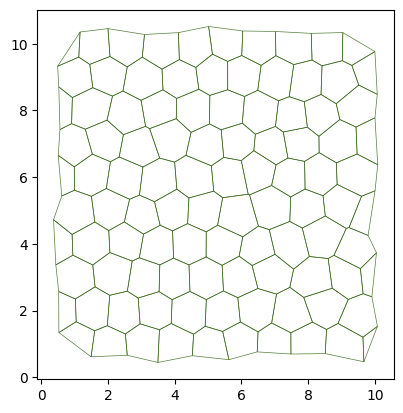

In [112]:
sheet = Sheet.planar_sheet_3d("sheet", nx=20, ny=20, distx=1, disty=1, noise = 0.1)
sheet.sanitize(trim_borders=True)
sheet = sheet.extract_bounding_box(x_boundary=(0.2,10.2), y_boundary=(0.2,10.2), coords=['x', 'y', 'z'])
sheet.sanitize(trim_borders=True)
SheetGeometry.update_all(sheet)
fig, ax = sheet_view(sheet)

In [113]:
sheet.edge_df["line_tension"] = 0.00
sheet.face_df["area_elasticity"] = 0.0
sheet.face_df["prefered_area"] = sheet.face_df["area"]
sheet.face_df["contractility"] = 0.00

In [114]:
sheet.face_df.loc[45, "prefered_area"] = sheet.face_df.loc[12, "area"]*2
sheet.face_df.loc[45, "area_elasticity"] = 1

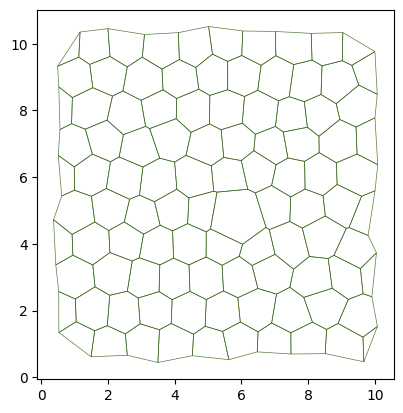

In [115]:
solver = QSSolver()
res = solver.find_energy_min(sheet, SheetGeometry, model)
fig, ax = sheet_view(sheet)

In [116]:
substrates = {
        "glucose": 0.06,
        "acetate": 0.12,
    }
# create the core object
core = ProcessTypes()
# register data types
core = register_types(core)
core.register_process("SimpleDiffusion", SimpleDiffusion)
results = run_tyssue_diffusion(core, sheet, substrates)
pprint(len(results))
static_sheet_video_2d(results, sheet, "glucose", vmax=10)

{'Compartments': {'0': {'Shared Environment': {'concentrations': {'acetate': 0.6646775146679063,
                                                                  'glucose': 4.434732393154885},
                                               'counts': {'acetate': 1.5336098951018218,
                                                          'glucose': 10.23225448459616},
                                               'volume': 2.307299195863518},
                        'position': [1.167313706228325,
                                     1.2555858383944063,
                                     0.0]},
                  '1': {'Shared Environment': {'concentrations': {'acetate': 1.3577170709597552,
                                                                  'glucose': 6.793545165301612},
                                               'counts': {'acetate': 4.345455586243124,
                                                          'glucose': 21.743152104647805},
                      